GROUP NUMBER 3
Members:
1. TONNY KAWUKI
2. SENTONGO PAUL
3. DIANA NAKIMBUGWE KIRABO
4. JACOB
5. ALEX KIBUUKA

Starting our work by importing the necessary libraries for both EDA and machine learning

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

we use the function below to read the dataset

In [174]:
df = pd.read_excel('DiamondPricesData.xlsx')

In [175]:
df.head(10)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


we use the above function to see the topmost portion of our dataset, which includes the first 10 rows. This can be helpful to quickly inspect the structure and content of the dataset

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


We use the above function to obtain a summary of the Dataset. It provides essential information about the DataFrame's structure.
from the above: 
 1. DataFrame contains 10 columns
 2.shows the range of the index, which is a sequential numbering of rows from 0 to 53939. therefore the dataset has a total of 53940 rows.
 3.Non-Null Count: The number of non-null (non-missing) values in each column. It indicates the presence of missing values in the Dataset
 4.Datatypes: float64(6), int64(1), object(3): This line summarizes the count and data type of columns in the Dataset. In this case, the Dataset has 6 columns with float64 (floating-point) data type, 1 column with int64 (integer) data type, and 3 columns with object data type (typically representing strings or mixed types).

In [177]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

CHECKING FOR DESCRIPTIVE STATISTICS UNDER DIFFERENT VARIABLES

Target variable price: these descriptive statistics provide insights into the distribution and summary of the "price" column's values. They help understand the central tendency (mean), dispersion (standard deviation), and distributional characteristics of the data, as well as identify the minimum and maximum values. 

so above stats show that standard deviation is close to the mean and that implies that the values under price could be normally distributed, but this will be further explained by the statistical results 

also to note above:
count: This indicates the number of non-null (non-missing) values in the "price" column, which is 53940 in this case. It implies that the column has no missing values.

mean: This represents the average value of the "price" column, which is approximately 3932.799722.

std: The standard deviation is a measure of how much the values in the "price" column deviate from the mean. In this case, the standard deviation is approximately 3989.439738. A larger standard deviation indicates a greater dispersion of values around the mean.

min: This denotes the minimum value in the "price" column, which is 326.000000. It represents the smallest observed value in the dataset.

25%: This is the first quartile or the 25th percentile of the "price" column. It signifies that 25% of the values in the column are below or equal to 950.000000.

50%: This is the second quartile or the median of the "price" column. It divides the distribution into two equal halves, with 50% of the values falling below or equal to 2401.000000.

75%: This is the third quartile or the 75th percentile of the "price" column. It implies that 75% of the values in the column are below or equal to 5324.250000.

max: This represents the maximum value in the "price" column, which is 18823.000000

In [178]:
df.describe(include=object)

,cut,color,clarity
count,53940,53934,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11286,13065


The above function: df.describe(include=object) is used to generate descriptive statistics for columns of the object data type (typically representing strings or mixed types) in the diamonds dataset

This can be useful for understanding categorical or textual data, identifying data quality issues, and performing exploratory data analysis on such columns.
from the above: 
count: The number of non-null (non-missing) values in the column.
unique: The number of distinct unique values in the column.
top: The most frequently occurring value in the column.
freq: The frequency of the most common value in the column

below we are looking for any missing variables with missing information:
the reason for this is to improve the quality of the data in our dataframe: By examining variables with missing information, you can assess the data quality and determine if further actions, such as data imputation or exclusion, are necessary.

In [179]:
df.isna().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

The function df.isna().sum() is used to calculate the number of missing values in each column of a Dataset

In [215]:
df = df.dropna()#dropping the missing values because they were less than 30% of the entire dataset
df.isna().sum()#this is to display the results after treating the missing values

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

EXAMINING OUTLIERS IN THE DATASET:

In summary, looking for outliers in a dataset helps ensure data quality, improve statistical analysis, uncover valuable insights, enhance model performance, and ensure accurate data interpretation. It is an essential step in data exploration, preprocessing, and analysis to ensure reliable and meaningful results.

From below, we are visualising the dataset and to see clearly how the data is distributed amongst different variables and this can as well show us any identified outliers

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'carat'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

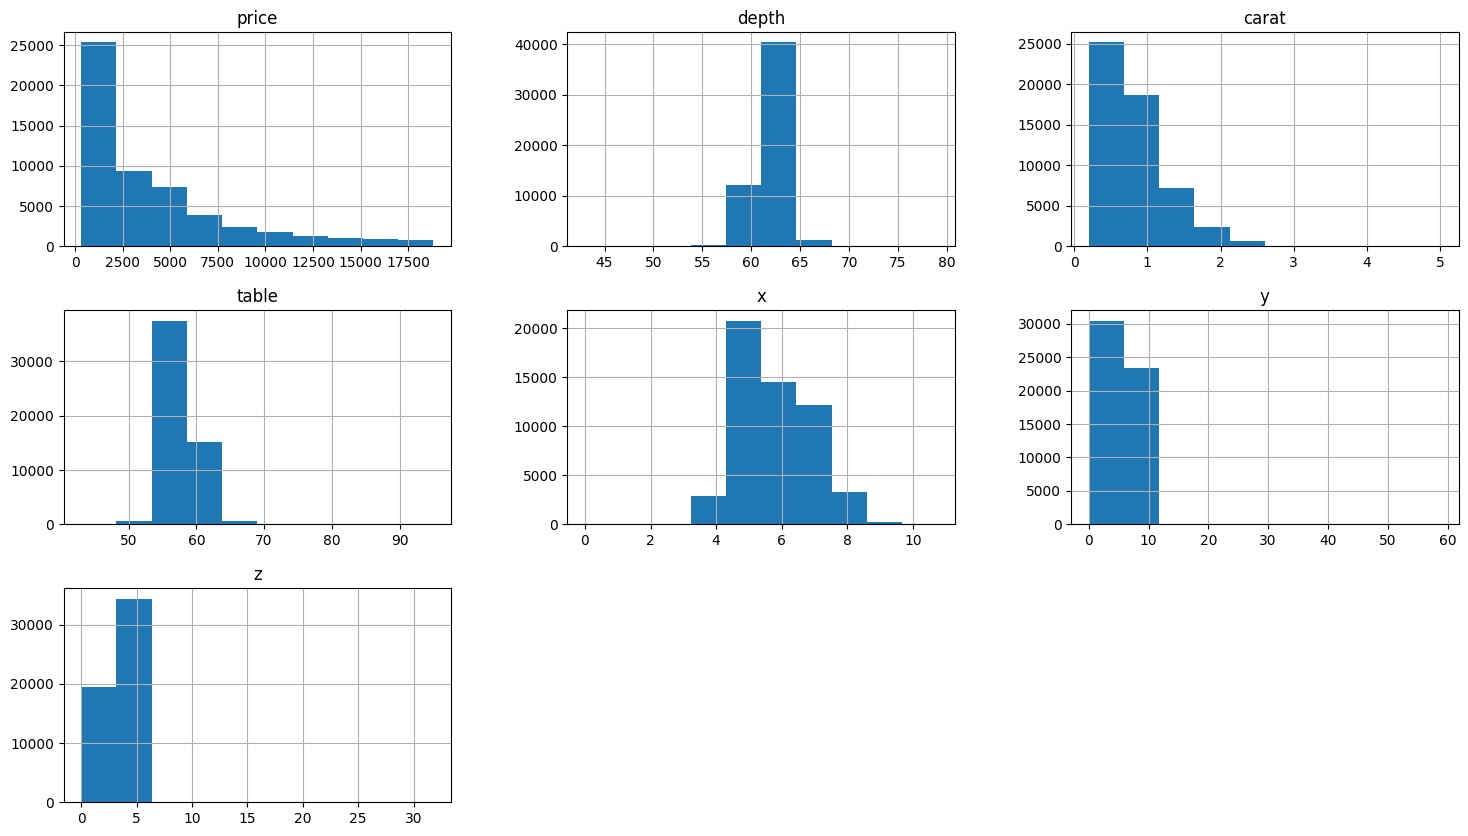

In [217]:
# to generate a histogram of multiple variables to see how data is distributed
# identifying outliers in price,table, carat, x,y,z. The reason for a histogram is because the values
# under these variables contain continuous data
df.hist(['price','depth', 'carat','table','x','y','z'], figsize=(18,10))

from above: we can visualise that;

-price is sort of having a normal distribution

-Carat is Positively-skewed i.e. mean>median

-depth having No observations before 57 and after 68. Clear indication of outliers.



Examining relationships between different continuos and categorical variables

the function below locates columns with continuous data and this will be impoortant in examining correlation

In [221]:
def display_continuous_columns(df):
    continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in continuous_columns:
        print(column)
df = pd.read_excel('DiamondPricesData.xlsx')

# Displaying columns with continuous data
display_continuous_columns(df)


price
carat
depth
table
x
y
z


the function below locates columns with categorical data in the dataset:

In [222]:
def display_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for column in categorical_columns:
        print(column)
df = pd.read_excel('DiamondPricesData.xlsx')

# Displaying columns with categorical data
display_categorical_columns(df)

cut
color
clarity


we used a boxplot to display relationship between the continuous and categorical variable

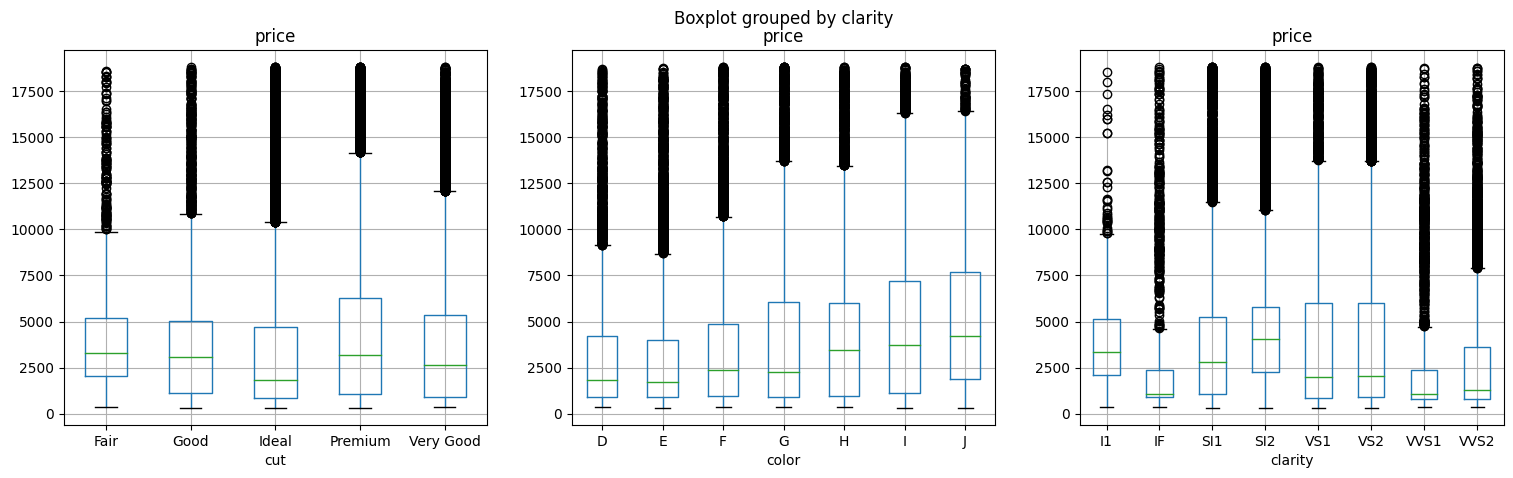

In [223]:
#The function below outputs a box plot that we use to visualise the relationships described above
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['cut', 'color', 'clarity']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))
# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

from the above: it calls for further statistical analysis of the boxplot because it is really hard to explain the features seen above. this shall be examined statistically below

we have agreed that our target variable should be price and below we further examine the distribution of all continuous variables vs price: we want to find out which variables have a high correlation vs price and hence to focus on those variables to be used for our machine learning models

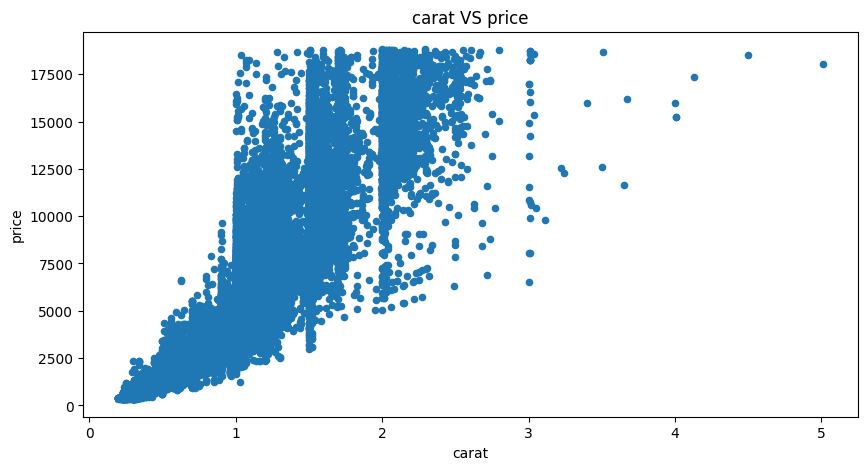

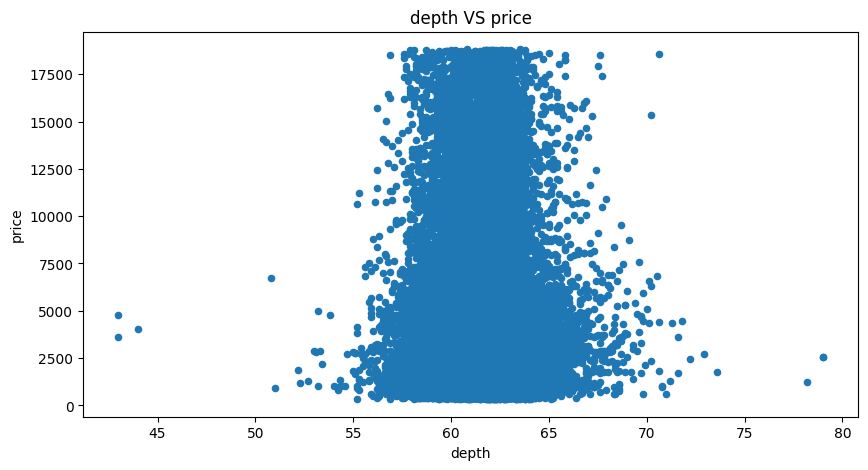

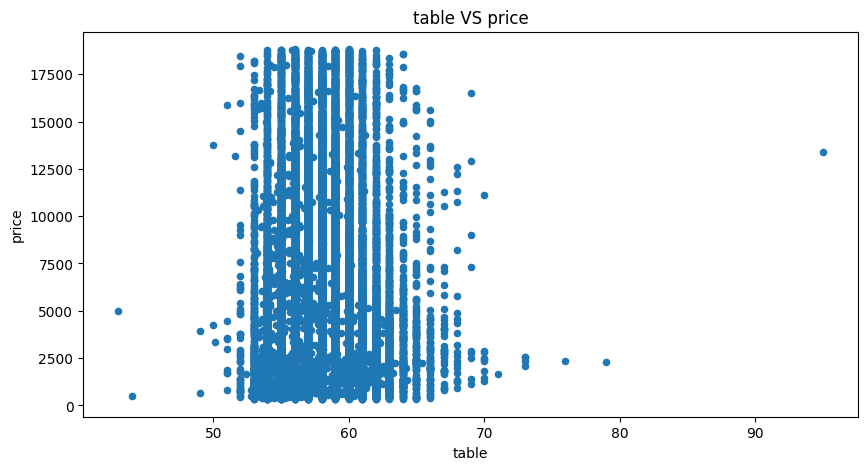

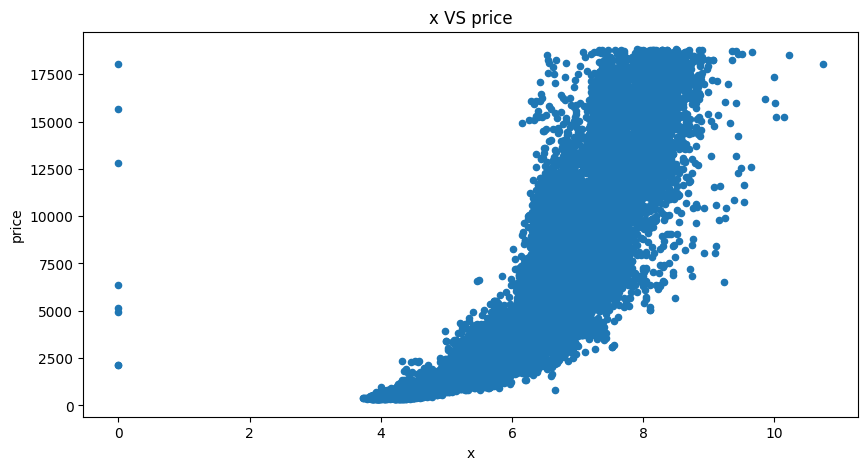

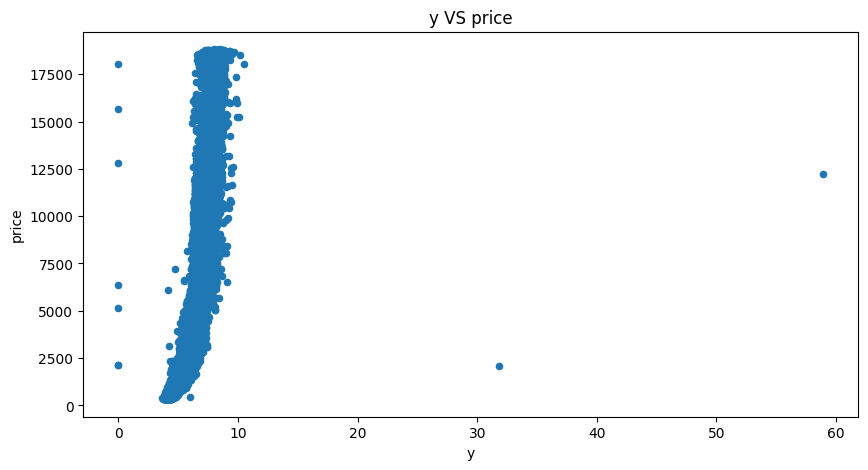

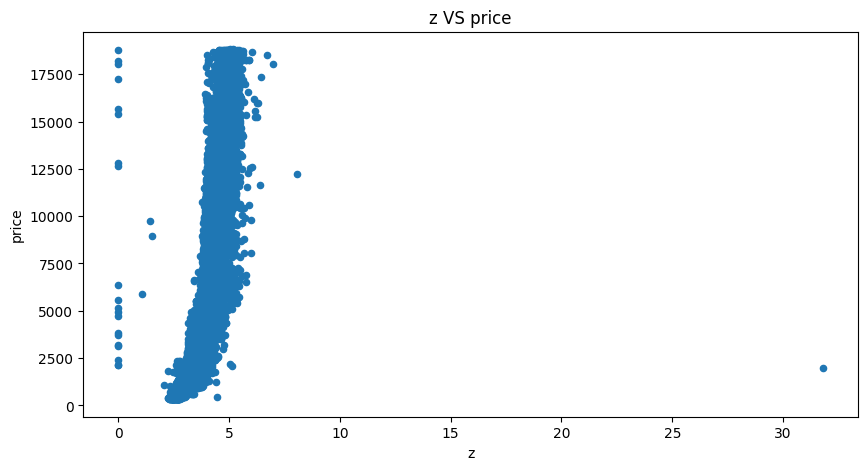

In [186]:
#Visual display of scatterplot for continuos variables vs price
#Plotting scatterplot for each continuos column values
#Therefore the target variable is "price"

ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

from the above, it is hard to explain the trends of distribution and this calls for further statistical examination by running a correlation matrix. we are purposely running a correlation matrix as a tool that is used when analysing relationships between continuos variables. having already explained our continuous variables, we run below correlation matrix to back up the above scatterplots and to explain them better.

In [187]:
#Correlation matrix between variables price carat depth and table, x, y,z
# Calculating correlation matrix
ContinuousVariables=['price', 'carat', 'depth', 'table','x','y','z']

# Creating the correlation matrix
CorrelationData=df[ContinuousVariables].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249
carat,0.921591,1.000000,0.028248,0.181618,0.975094,0.951722,0.953387
depth,-0.010647,0.028248,1.000000,-0.295734,-0.025245,-0.029296,0.094969
table,0.127134,0.181618,-0.295734,1.000000,0.195344,0.183760,0.150929
x,0.884435,0.975094,-0.025245,0.195344,1.000000,0.974701,0.970772
y,0.865421,0.951722,-0.029296,0.183760,0.974701,1.000000,0.952006
z,0.861249,0.953387,0.094969,0.150929,0.970772,0.952006,1.000000


Correlation values range from -1 to +1 indicating very strong negative or positive correlation.
In statistical terms, the correlation coefficient ranges from -1 to +1.

A value of 1.000000 on the diagonal (e.g., the correlation of a variable with itself) indicates a perfect positive correlation since it represents the relationship of a variable with itself.

Values close to +1 (e.g., 0.921591, 0.884435, 0.865421, etc.) indicate a strong positive correlation. For example, the variables "price" and "carat" have a correlation coefficient of 0.921591, suggesting a strong positive linear relationship between them.

Values close to -1 (e.g., -0.295734) indicate a strong negative correlation. For example, the variables "depth" and "table" have a correlation coefficient of -0.295734, suggesting a strong negative linear relationship between them.

Values close to 0 (e.g., -0.010647, 0.127134, etc.) indicate a weak or no linear correlation. For example, the variables "price" and "depth" have a correlation coefficient of -0.010647, suggesting a very weak or no linear relationship between them.

Note: Features/variables with strong correlation between them get selected for feature engineering in inference analyses

the function below filters columns that have strong correlation vs the target variable price by focusing on 
any correlation value above 0.5.
By using the function below, we are extracting the subset of values in the 'price' column that are strongly correlated (positively or negatively) with other variables in the dataset. This can be useful for further analysis or visualization, focusing on the most impactful relationships involving the 'price' variable.

In [188]:
# Filtering only those columns where absolute correlation > 0.5 with the Target Variable "price"
CorrelationData['price'][abs(CorrelationData['price']) > 0.5 ]

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

to test the relationship amongst all categorical colums vs target variable price: we use anova test.
By performing an ANOVA test, we can determine if there are significant differences among the means of the variables being compared. If the null hypothesis is rejected, it indicates that at least one variable differs significantly from the others

we are using anova because it involves testing relationships between categorical and continuos variables

In [190]:
#ANOVA tests:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [191]:
#Or use the function to check all the categorical variables for their correlations with price
CategoricalPredictorList=['color', 'clarity', 'cut']
FunctionAnova(inpData=Diamonds, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.9190895e-316
cut is correlated with price | P-Value: 8.42830730759452e-150


['color', 'clarity', 'cut']

the overrall statistical analysis shows that there is correlation amongst color, clarity,cut,carat, x, y,z vs the target variable price and that confirms that all their data will be used for predictions and ML TECHNIQUES

DATA PRE PROCESSING FOR ML

This process involves converting all non numerical values into numerical and in the dataset,
non numeric values include cut	color	clarity values.


In [192]:
import pandas as pd
df = pd.read_excel('DiamondPricesData.xlsx')

# Dropping rows with missing values
df.dropna(inplace=True)

# Printing the updated dataset
print(df)


       price  carat        cut color clarity  depth  table     x     y     z
0        326   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1        326   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2        327   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3        334   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4        335   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
53935   2757   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
53936   2757   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
53937   2757   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
53938   2757   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
53939   2757   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64

[53920 rows x 10 columns]


In [193]:
# Making cut Column contiunous data  
df["cut"].replace(["Fair", "Good", "Ideal","Premium","Very Good"], [1, 2, 3, 4, 5], inplace=True)
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,3,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,4,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,3,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,5,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,4,H,SI2,61.0,58.0,6.15,6.12,3.74


In [194]:
# Make color Column contiunous data  
df["color"].replace(["D", "E", "F","G","H","I","J","NA"], [1, 2, 3, 4, 5, 6, 7, 0], inplace=True)
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,3,2,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,4,2,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,2,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,6,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,7,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,3,1,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,1,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,5,1,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,4,5,SI2,61.0,58.0,6.15,6.12,3.74


In [195]:
# Make clarity Column contiunous data  
df["clarity"].replace(["I1", "IF", "SI1","SI2","VS1","VS2","VVS1","VVS2"], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,3,2,4,61.5,55.0,3.95,3.98,2.43
1,326,0.21,4,2,3,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,2,5,56.9,65.0,4.05,4.07,2.31
3,334,0.29,4,6,6,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,7,4,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,3,1,3,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,1,3,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,5,1,3,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,4,5,4,61.0,58.0,6.15,6.12,3.74


In [196]:
# Generate the predictor input

X = df.drop(columns=["price"])
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,3,2,4,61.5,55.0,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,6,6,62.4,58.0,4.20,4.23,2.63
4,0.31,2,7,4,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,3,1,3,60.8,57.0,5.75,5.76,3.50
53936,0.72,2,1,3,63.1,55.0,5.69,5.75,3.61
53937,0.70,5,1,3,62.8,60.0,5.66,5.68,3.56
53938,0.86,4,5,4,61.0,58.0,6.15,6.12,3.74


In [197]:
# Generate the target output

y = df['price']
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53920, dtype: int64

because the dataset still shows missing values, it is the reason as to why we cant train the model.
to try and delete these nan values. also shape above after deleting the useless columns that should be used in prediction. they make the data too big and widen the sample data

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_excel('DiamondPricesData.xlsx')

# Randomly sample 20% of the data
sampled_data = df.sample(frac=0.2, random_state=42)

# Printing the number of samples in the original and sampled datasets
print("Original dataset size:", len(df))
print("Sampled dataset size:", len(sampled_data))


Original dataset size: 53940
Sampled dataset size: 10788


In [200]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [201]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37744, 9)
(37744,)
(16176, 9)
(16176,)


In [203]:
import numpy as np

# Assuming X is your input features NumPy ndarray and y is your target variable

# Replace NaN values in X with 0
X_filled = np.nan_to_num(X, nan=0.0)

# Continue with your machine learning training using X_filled and y


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming X_filled is your input features DataFrame with NaN values replaced by 0
# and y is your corresponding target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)

# Create and train the machine learning model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Print the model's performance
print("Training score:", train_score)
print("Testing score:", test_score)


Training score: 0.8863811612861306
Testing score: 0.8792119629633361


basing on the above results the model seems to have achieved reasonably good performance, both in terms of fitting the training data and generalizing to unseen testing data. 
A testing score of 0.8792119629633361 suggests that the model predicts the target variable with an accuracy of approximately 87.92% on the testing data.

The prediction model used is linear regression.
the end